In [1]:
! pip install xgboost

import xgboost as xgb

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

In [4]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'
data = pd.read_csv(source, sep=';')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [5]:
data.drop(['Set'], axis = 1, inplace = True)


## Haciendo una conversión de variables ordinales manualmente y personalizada

In [6]:
label = list(data['Spending_Score'].unique()) # se crea una lista con las etiquetas
num = [1,2,3] # lista de valores numéricos para cada etiqueta
mapping = {}  # diccionario de equivalencia entre listas

for x,y in enumerate(label):
    print(x, y)
    mapping[y] = num[x]

print(mapping)

0 Low
1 Average
2 High
{'Low': 1, 'Average': 2, 'High': 3}


In [7]:
data.Spending_Score = data.Spending_Score.map(mapping)

In [8]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,2,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,3,6.0


In [9]:
X = data.drop(['Spending_Score', 'ID'], axis = 1)
X = pd.get_dummies(X, drop_first=True, columns = ['Gender', 'Ever_Married', 'Graduated'])
X = pd.get_dummies(X, drop_first=True, columns = ['Profession'])
Y = data[['Spending_Score']]
#X = data[['Gender']]

In [10]:
X.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,22,1.0,4.0,True,False,False,False,False,False,False,True,False,False,False
1,38,NaN,3.0,False,True,True,False,True,False,False,False,False,False,False
2,67,1.0,1.0,False,True,True,False,True,False,False,False,False,False,False
3,67,0.0,2.0,True,True,True,False,False,False,False,False,False,True,False
4,40,NaN,6.0,False,True,True,False,False,True,False,False,False,False,False


In [11]:
Y = LabelEncoder().fit_transform(Y)

tareas = [('imputer', SimpleImputer(strategy='most_frequent'))]

X2 = Pipeline(tareas).fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X2,Y, random_state = 2)

tree = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')

tree.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

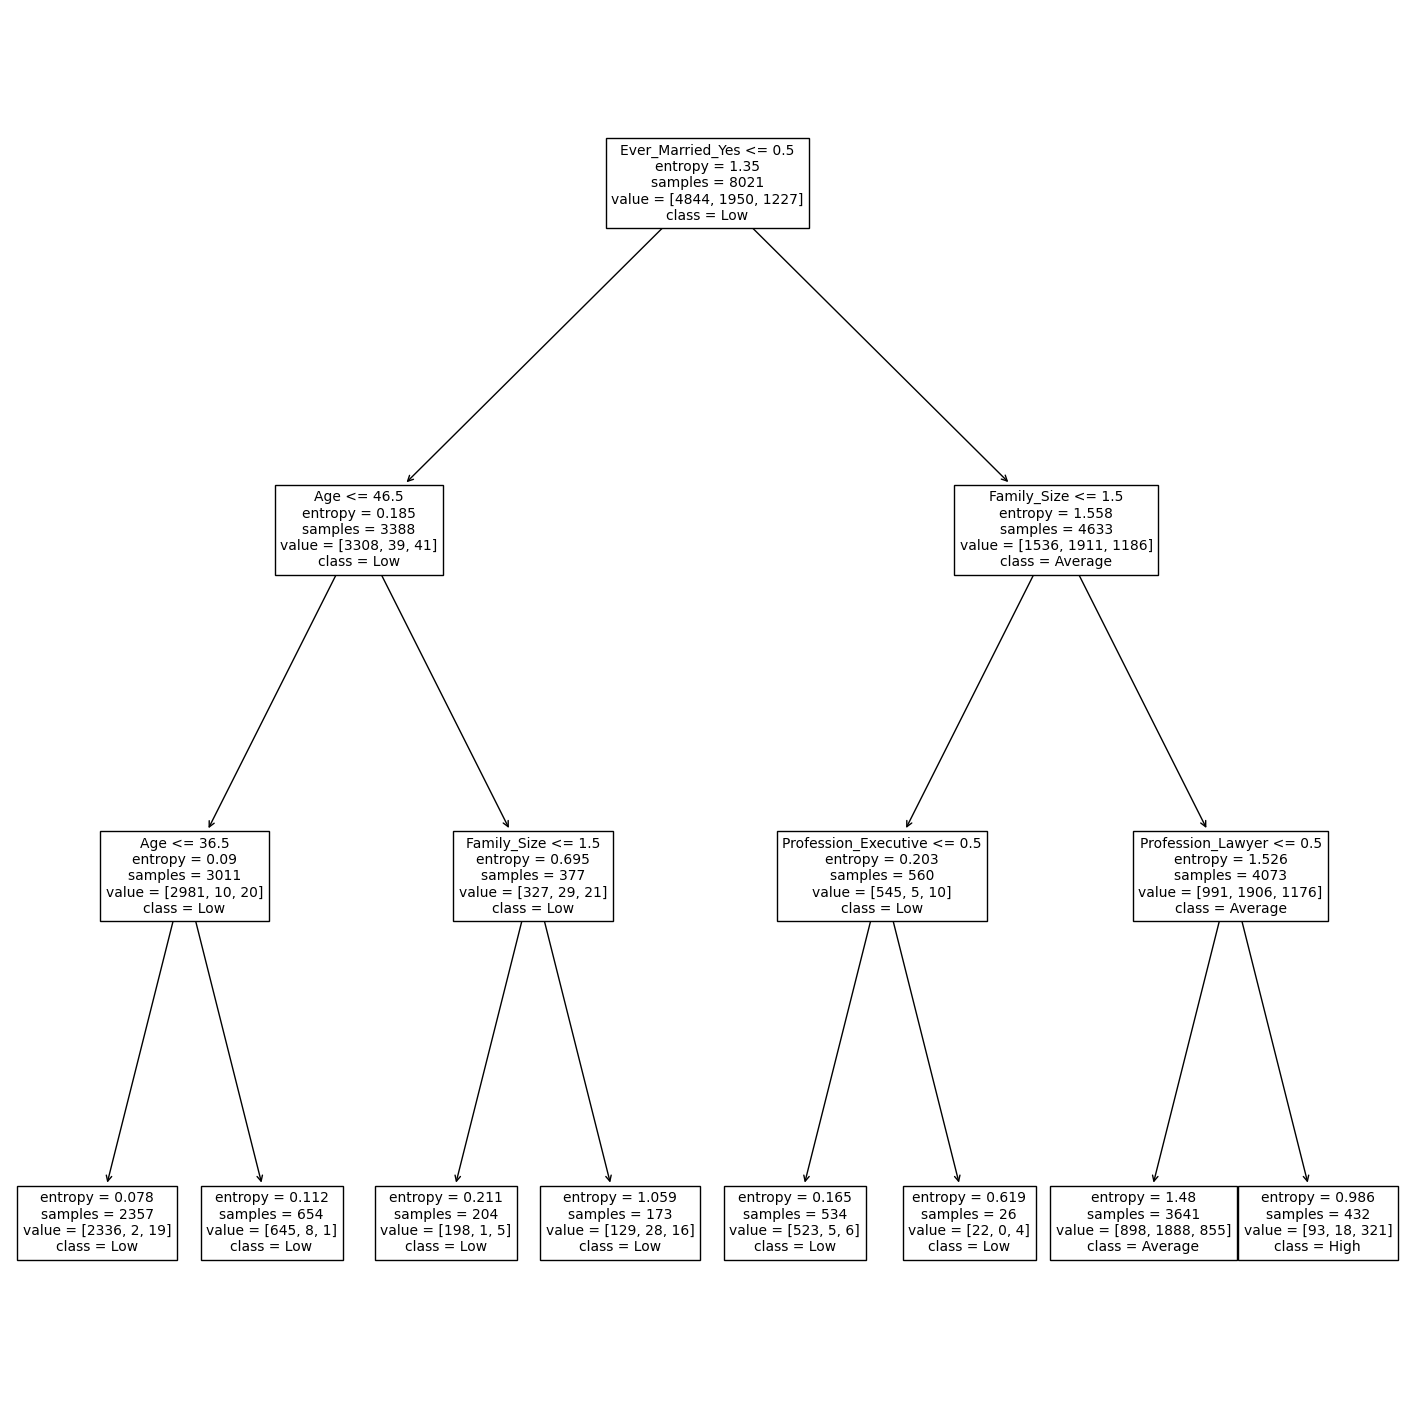

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10, class_names=label, feature_names=X.columns)
plt.show()

## How the classification tree branches based on the PURITY of each node.?

# Coeficiente de Gini

![image.png](attachment:94beaa77-f2b1-469c-b171-bfc01fefda86.png)



# Entropía - Valor esperado de la sorpresa

![image.png](attachment:14583755-f450-4b19-b279-4048b532872b.png)

In [13]:
tree_pred = tree.predict(x_test)

print('TREE RESULTS')
print(classification_report(y_test, tree_pred,target_names=label))


TREE RESULTS
              precision    recall  f1-score   support

         Low       0.98      0.81      0.88      1650
     Average       0.54      0.97      0.69       649
        High       0.79      0.30      0.43       375

    accuracy                           0.77      2674
   macro avg       0.77      0.69      0.67      2674
weighted avg       0.85      0.77      0.77      2674



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bosque = RandomForestClassifier(max_depth = 3, random_state=0)

In [ ]:
def forest(est=100, prof=2): # estimadores en el bosque de clasificación, profundidad de los árboles

    print(f'{est} estimadores con {prof} de profundidad \n')

    X = data.drop(['Spending_Score', 'ID'], axis = 1)

    Y = data[['Spending_Score']]

    X1 = pd.get_dummies(X)

    Y = LabelEncoder().fit_transform(Y)

    x_train, x_test, y_train, y_test = train_test_split(X1,Y, random_state = 2)

    bosque = RandomForestClassifier(n_estimators = est, max_depth = prof, random_state=0).fit(x_train, y_train)

    pred = bosque.predict(x_test)

    #plot_confusion_matrix(bosque, x_test, y_test, display_labels=label,values_format='d',cmap='hot')

    print(classification_report(y_test, pred,target_names=label))

In [ ]:
for p in [10, 20, 50, 100, 200]:
    forest(est=p, prof = 4)

## Workshop

Graph the overfitting test exercise. On the x axis goes the 'n: number of estimators/trees'. On the Y axis graph the scores stored on the lists 'train' and 'test' as two independent series.

## Complementary resourses

The next video is esencial for understunding what we will cover on the next lesson. Some of its main ideas might be part of the evaluations.

https://www.youtube.com/watch?v=LsK-xG1cLYA